### MovieLens Dataset - Prepared for Women Who Code - Python for Data Analysis Series

#### Data Preprocessing and Feature Engineering

In [139]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [140]:
#import datasets
movies_df=pd.read_csv("ml-latest-small/movies.csv")
ratings_df=pd.read_csv("ml-latest-small/ratings.csv")
tags_df=pd.read_csv("ml-latest-small/tags.csv")
links_df=pd.read_csv("ml-latest-small/links.csv")

In [141]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###### Explore movies.csv

In [142]:
movies_df.shape

(9742, 3)

In [143]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [144]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###### Explore ratings.csv

In [145]:
ratings_df.shape

(100836, 4)

In [146]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [147]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


###### Explore tags.csv

In [148]:
tags_df.shape

(3683, 4)

In [149]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [150]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


###### Explore links.csv

In [151]:
links_df.shape

(9742, 3)

In [152]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB


In [153]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


###### Now that we have a basic idea on the data provided let's what needs to be done to make the dataset ready for analysis/modeling.'

### Data Preprocessing - movies_df

#### Movie Year?

The year of the movie is within the title field. Let's split it so that we can do analysis by year.

In [154]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [155]:
movies_df['year']=movies_df['title'].str.extract('(\d\d\d\d)', expand=True)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


###### Plot movie count by year to see trend

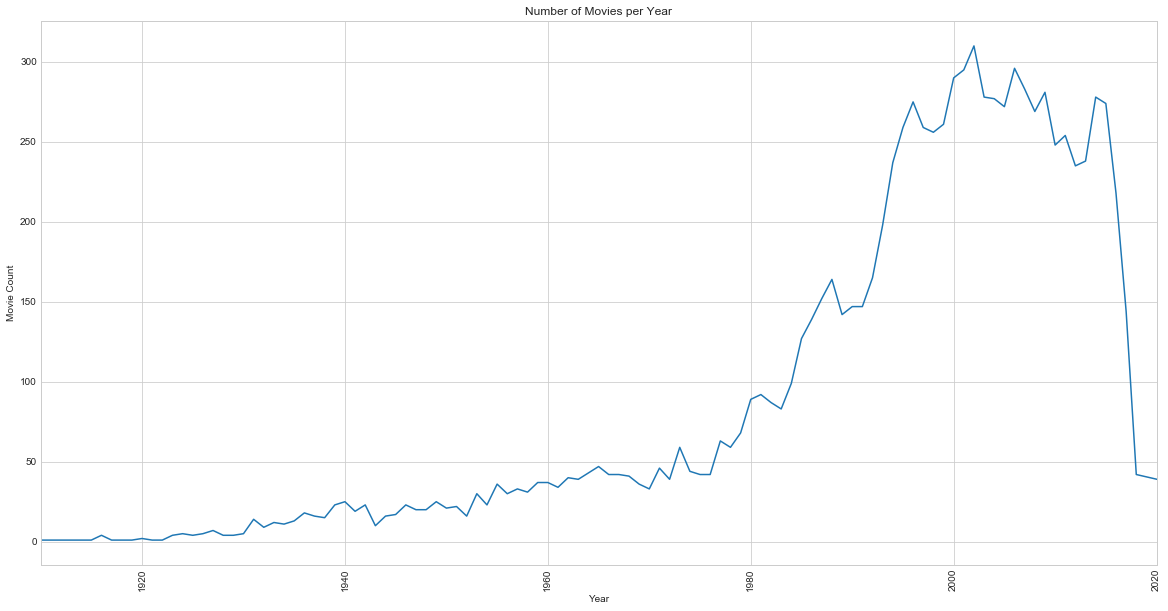

In [156]:
plt.figure(figsize=(20,10))
plt.plot(movies_df.groupby(['year']).count()['title'])
plt.xticks(rotation=90)
plt.xlim(1910,2020)
plt.title("Number of Movies per Year")
plt.xlabel('Year')
plt.ylabel('Movie Count')

###### Whats the best way to feature engineer genres

In [157]:
#separate as genre_0, genre_1,.......
movies_df['genres'].str.split('|', expand=True).head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


This is what we get if we split to genre_0,genre_1,......
However, this is not a useful representation for analysis and modeling

In [158]:
#separate as genre_X, genre_y,.......   
movies_df.genres.str.get_dummies(sep='|').head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This is what we get when we do one hot encoding.

In [159]:
movies_df = pd.concat([movies_df.drop('genres', axis=1), movies_df.genres.str.get_dummies(sep='|')], axis=1) 

In [160]:
movies_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing - ratings_df

###### How many unique users

In [174]:
ratings_df.userId.nunique()

610

###### How many unique movies were rated

In [175]:
ratings_df.movieId.nunique()

9724

There were 9742 movies in the movies dataframe. Looks like we have atleast one rating for most movies.

###### Change dtype of Rating Timestamp

In [177]:
ratings_df['rating_timestamp']=pd.to_datetime(ratings_df['timestamp'], unit='s')

###### Feature Engineering with Dates

In [179]:
ratings_df['rating_timestamp_month']=ratings_df['rating_timestamp'].dt.month
ratings_df['rating_timestamp_year']=ratings_df['rating_timestamp'].dt.year
ratings_df['rating_timestamp_week']=ratings_df['rating_timestamp'].dt.week
ratings_df['rating_timestamp_dayofweek']=ratings_df['rating_timestamp'].dt.weekday
ratings_df['rating_timestamp_hour']=ratings_df['rating_timestamp'].dt.hour

In [181]:
ratings_df.head()

,userId,movieId,rating,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
0,1,1,4.0,964982703,2000-07-30 18:45:03,7,2000,30,6,18
1,1,3,4.0,964981247,2000-07-30 18:20:47,7,2000,30,6,18
2,1,6,4.0,964982224,2000-07-30 18:37:04,7,2000,30,6,18
3,1,47,5.0,964983815,2000-07-30 19:03:35,7,2000,30,6,19
4,1,50,5.0,964982931,2000-07-30 18:48:51,7,2000,30,6,18


###### Data Visualization based on derived fields.

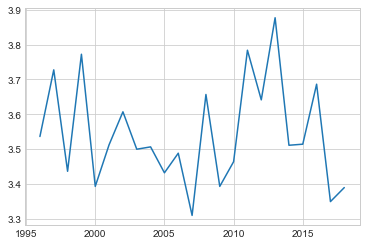

In [185]:
#Average rating by year
plt.plot(ratings_df.groupby(['rating_timestamp_year']).mean()['rating'])

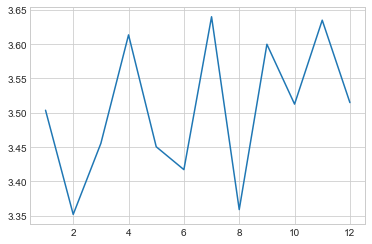

In [189]:
#Average rating by month
plt.plot(ratings_df.groupby(['rating_timestamp_month']).mean()['rating'])

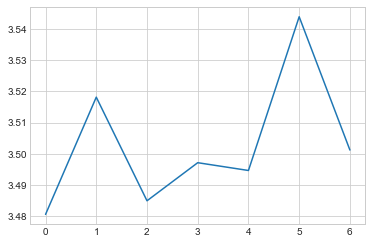

In [190]:
#Average rating by day of week
plt.plot(ratings_df.groupby(['rating_timestamp_dayofweek']).mean()['rating'])

In [ ]:
#Average rating by day of week
plt.plot(ratings_df.groupby(['rating_timestamp_month']).mean()['rating'])

###### Merge movies with ratings

In [110]:
movieratings_df = pd.merge(movies_df, ratings_df)

In [112]:
movieratings_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,17,4.5,1305696483


In [ ]:
Average Rating per 